# 0. Imports

##Note: all code in this notebook was written in Google Colab

In [592]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [593]:
!pip install pandas numpy scikit-learn matplotlib seaborn

# 1. Data Preprocessing and Exploration

### 1. Load the Dataset:

In [594]:
#a) and b)
#as_frame automatically converts the dataset to a pandas df
from sklearn.datasets import fetch_california_housing
features_df, target_df = fetch_california_housing(as_frame=True, return_X_y=True) #return_X_y returns the features and target as df instead of bunch object

In [595]:
features_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [596]:
target_df

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [597]:
df = pd.concat([features_df, target_df], axis=1) #concat these 2 dfs along the y axis to create 1 df

In [598]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. Explore the Dataset:

####a)

In [599]:
df.shape #shape

(20640, 9)

In [600]:
df.columns #column names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [601]:
df.dtypes #column data types

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


In [602]:
df.describe() #summary statistics

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


####b)

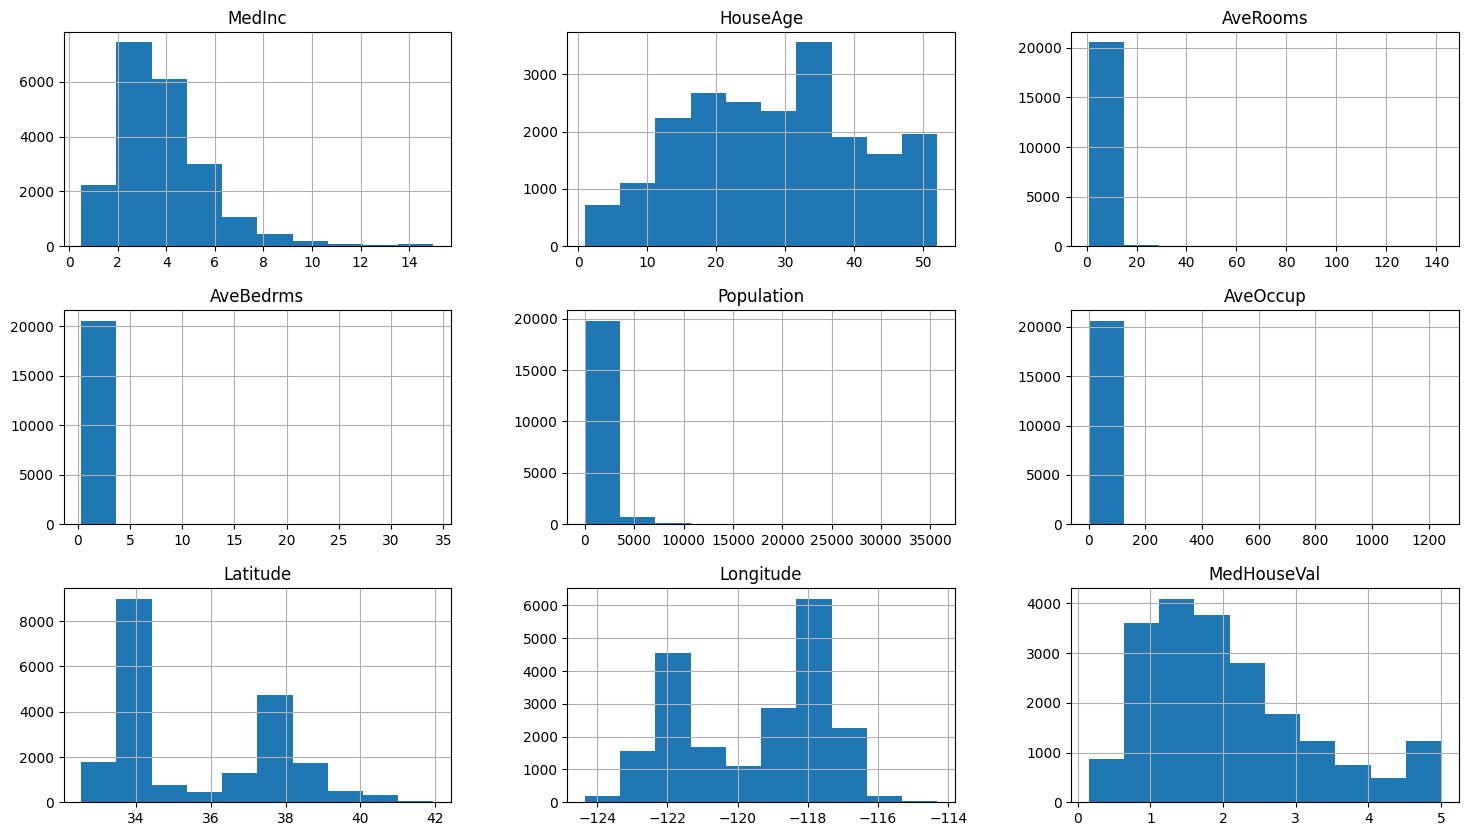

In [603]:
df.hist(figsize=(18, 10)) #the histograms are all plotted together if we use pandas built in df.hist method
plt.show()

### 3. Handle Missing Data:

In [604]:
#a)
rows_to_null = df.sample(frac=0.1).index

df.loc[rows_to_null, ["AveRooms", "AveOccup"]] = np.nan

df.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,NaN,1.081081,565.0,NaN,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [605]:
original_mean_1, original_mean_2 = df[["AveRooms", "AveOccup"]].mean()

In [606]:
#b)
df.fillna(df.mean(), inplace=True)

In [607]:
df[(df["AveRooms"] == original_mean_1) & (df["AveOccup"] == original_mean_2)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4,3.8462,52.0,5.424549,1.081081,565.0,3.014522,37.85,-122.25,3.422
17,2.1202,52.0,5.424549,0.966997,648.0,3.014522,37.85,-122.27,1.555
32,1.7969,48.0,5.424549,1.220896,1026.0,3.014522,37.84,-122.27,1.104
60,3.3929,52.0,5.424549,1.128342,554.0,3.014522,37.83,-122.29,0.757
63,1.1910,52.0,5.424549,1.490566,521.0,3.014522,37.81,-122.30,0.761
...,...,...,...,...,...,...,...,...,...
20558,4.5526,10.0,5.424549,1.005291,1073.0,3.014522,38.67,-121.80,1.544
20581,3.1534,20.0,5.424549,1.057416,459.0,3.014522,38.83,-122.21,1.234
20598,1.9122,38.0,5.424549,0.987531,837.0,3.014522,39.15,-121.58,0.555
20626,2.1667,36.0,5.424549,1.076023,504.0,3.014522,39.18,-121.43,0.938


since there are 2064 rows (10% of the dataset) that match these original means, this means that we were successful in replacing the missing data

### 4. Feature Scaling:

In [608]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.424549,1.096675,1425.476744,3.014522,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.213168,0.473911,1132.462122,5.741078,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.532898,1.006079,787.000000,2.474247,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.395368,1.048780,1166.000000,2.903024,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,5.945679,1.099526,1725.000000,3.214697,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,599.714286,41.950000,-114.310000,5.000010


In [609]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [610]:
#a) and b)
#all features are numerical and should be scaled by standard scaler
#standard scaler = z-score scaler

scaler = StandardScaler()

scaled_feature_columns = scaler.fit_transform(df.drop(["Latitude", "Longitude", "MedHouseVal"], axis=1)) #returns scaled features as np arrays

scaled_features_df = pd.DataFrame(scaled_feature_columns, columns=df.drop(["Latitude", "Longitude", "MedHouseVal"], axis=1).columns)

One thing to note is that I did not scale Latitude or Longitude, because these are coordinates and thus not numerical in the sense the other columns are, since they're values don't have significance when they increase or decrease

This led to a better performance in the clustering algorithms

In [611]:
scaled_features_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.344766,0.982143,0.704699,-0.153758,-0.974429,-0.079946
1,2.332238,-0.607019,0.367622,-0.263336,0.861439,-0.157584
2,1.782699,1.856182,1.293918,-0.049016,-0.820777,-0.036973
3,0.932968,1.856182,0.177489,-0.049833,-0.766028,-0.081272
4,-0.012881,1.856182,0.000000,-0.032906,-0.759847,0.000000
...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.171294,0.077354,-0.512592,-0.079067
20636,-0.691593,-0.845393,0.000000,0.462365,-0.944405,0.000000
20637,-1.142593,-0.924851,-0.098958,0.049414,-0.369537,-0.119996
20638,-1.054583,-0.845393,-0.042942,0.158778,-0.604429,-0.155256


In [612]:
df = pd.concat([scaled_features_df, df[["Latitude", "Longitude", "MedHouseVal"]]], axis=1) #concat the dfs back together along y axis

In [613]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000,20640.000000,20640.000000
mean,6.609700e-17,5.508083e-18,7.160508e-17,-1.060306e-16,-1.101617e-17,-6.506423e-17,35.631861,-119.569704,2.068558
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,2.135952,2.003532,1.153956
min,-1.774299e+00,-2.196180e+00,-2.068757e+00,-1.610768e+00,-1.256123e+00,-4.045008e-01,32.540000,-124.350000,0.149990
25%,-6.881186e-01,-8.453931e-01,-4.028941e-01,-1.911716e-01,-5.638089e-01,-9.410921e-02,33.930000,-121.800000,1.196000
50%,-1.767951e-01,2.864572e-02,-1.318524e-02,-1.010650e-01,-2.291318e-01,-1.942153e-02,34.260000,-118.490000,1.797000
75%,4.593063e-01,6.643103e-01,2.354740e-01,6.015869e-03,2.644949e-01,3.486800e-02,37.710000,-118.010000,2.647250
max,5.858286e+00,1.856182e+00,6.167082e+01,6.957171e+01,3.025033e+01,1.039377e+02,41.950000,-114.310000,5.000010


Mean of MedHouseVal (target variable) did not change, so it remained unchanged during this process

# 2. Regression Models

### 1. Split the Dataset: Divide the dataset into training (80%) and testing (20%) subsets.

In [614]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("MedHouseVal", axis=1), df["MedHouseVal"], train_size=0.8, random_state=27)

In [615]:
X_train.head(5) #feature columns

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1247,-0.853085,-1.481058,0.000000,0.355837,-1.122782,0.000000,39.10,-122.33
12700,-0.206483,0.584852,-0.203438,-0.264967,-0.091375,-0.155468,38.61,-121.41
16815,0.177036,1.061601,-0.053523,-0.242316,0.384590,-0.104647,37.64,-122.43
6331,0.601928,-1.083767,0.251865,-0.118324,0.876451,0.108269,33.99,-117.95
6309,-0.360922,0.108104,0.000000,-0.156757,2.297283,0.000000,34.04,-117.99


In [616]:
y_train.head(5) #labels

,MedHouseVal
1247,0.750
12700,1.055
16815,2.727
6331,2.699
6309,1.683


### 2. Apply Regression Models:

In [617]:
# (a) Train Linear Regression, Lasso Regression, and Ridge Regression model
# (b) Use grid search (’alpha’: [0.01, 0.1, 1, 10]) and 5-fold cross-validation to tune hyperparameters for Lasso and Ridge models.

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

linear_model.fit(X_train, y_train)

param_grid = {
    "alpha": [0.01, 0.1, 1, 10]
}

lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5, refit=True)
ridge_grid = GridSearchCV(ridge_model, param_grid, cv=5, refit=True) #cv=5 is the cross validation

lasso_grid.fit(X_train, y_train)
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10]})

In [651]:
print(lasso_grid.best_params_, ridge_grid.best_params_)

{'alpha': 0.01} {'alpha': 10}


### 3. Evaluate Regression Performance:

In [619]:
#a) and b)

linear_y_pred = linear_model.predict(X_test)
lasso_y_pred = lasso_grid.predict(X_test)
ridge_y_pred = ridge_grid.predict(X_test)

In [620]:
linear_mse = mean_squared_error(y_test, linear_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)

linear_mae = mean_absolute_error(y_test, linear_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)

linear_r2 = r2_score(y_test, linear_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("     Linear              Lasso           Ridge        ")
print(linear_mse, lasso_mse, ridge_mse)
print(linear_mae, lasso_mae, ridge_mae)
print(linear_r2, lasso_r2, ridge_r2)

     Linear              Lasso           Ridge        
0.5902731567410454 0.545450575962274 0.5891874864610238
0.5333506147634722 0.5353261630814855 0.5333730289547383
0.552323524321004 0.5863179805565948 0.5531469211486573


# 3.  Data Reformating and Logistic Regression

### 1. Reformat Data:

In [621]:
df["MedHouseVal"] = np.where(df["MedHouseVal"] >= df["MedHouseVal"].median(), 1, 0)
#we'll just assume that values above *or equal* to the median for the first condition, since the condition of being equal to the median is not specified

In [622]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.704699,-0.153758,-0.974429,-0.079946,37.88,-122.23,1
1,2.332238,-0.607019,0.367622,-0.263336,0.861439,-0.157584,37.86,-122.22,1
2,1.782699,1.856182,1.293918,-0.049016,-0.820777,-0.036973,37.85,-122.24,1
3,0.932968,1.856182,0.177489,-0.049833,-0.766028,-0.081272,37.85,-122.25,1
4,-0.012881,1.856182,0.000000,-0.032906,-0.759847,0.000000,37.85,-122.25,1
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.171294,0.077354,-0.512592,-0.079067,39.48,-121.09,0
20636,-0.691593,-0.845393,0.000000,0.462365,-0.944405,0.000000,39.49,-121.21,0
20637,-1.142593,-0.924851,-0.098958,0.049414,-0.369537,-0.119996,39.43,-121.22,0
20638,-1.054583,-0.845393,-0.042942,0.158778,-0.604429,-0.155256,39.43,-121.32,0


### 2. Perform Logistic Regression:

In [623]:
#let's reassign these values for the new categorical labels
X_train, X_test, y_train, y_test = train_test_split(df.drop("MedHouseVal", axis=1), df["MedHouseVal"], train_size=0.8, random_state=27)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [624]:
log_regression_y_pred = logistic_regression.predict(X_test)

### 3. Evaluate Classification Performance:

In [625]:
#a)
accuracy = accuracy_score(y_test, log_regression_y_pred)
precision = precision_score(y_test, log_regression_y_pred)
recall = recall_score(y_test, log_regression_y_pred)
f1 = f1_score(y_test, log_regression_y_pred)
roc_auc = roc_auc_score(y_test, log_regression_y_pred)
print("accuracy: ", round(accuracy, 4), "precision: ", round(precision, 4), "recall: ", round(recall, 4), "f1 score: ", round(f1, 4), "roc auc: ", round(roc_auc, 4))

accuracy:  0.781 precision:  0.7885 recall:  0.7703 f1 score:  0.7793 roc auc:  0.781


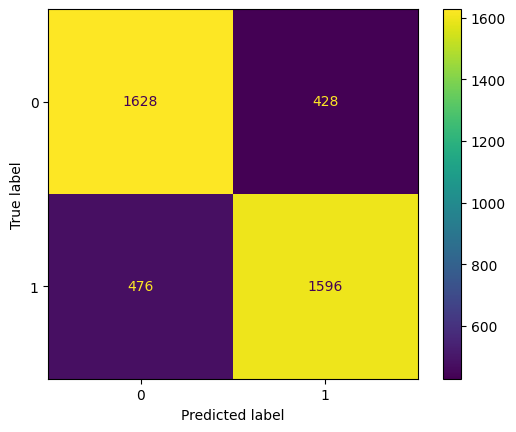

In [626]:
#b)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, log_regression_y_pred, labels=[0, 1])
pl = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[0, 1]) #use scikit learns built in display

pl.plot()
plt.show()

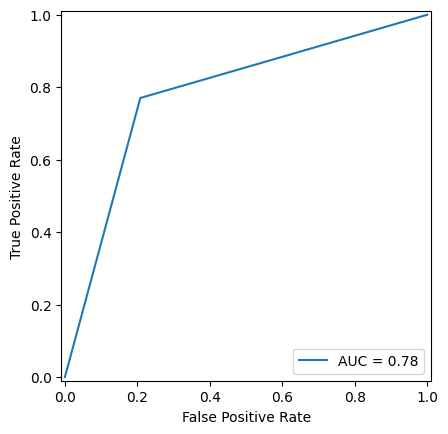

In [627]:
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, log_regression_y_pred)
pl = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) #use scikit learns built in display
pl.plot()

plt.show()

# 4. Clustering Analysis

### 1. Perform K-Means Clustering:

In [642]:
#a)
features = df.drop("MedHouseVal", axis=1)

inertia_values = [] #same thing as the sum of squared distances (SSD)
k_preds = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k).fit(features)
  inertia_values.append(kmeans.inertia_)
  k_preds.append(kmeans.predict(features)) #append all the predictions for now

k_vals = np.arange(1, 11) #from 1 to 10
inertia_values = np.array(inertia_values)



In [643]:
inertia_values

array([300848.98028089, 150028.93607797, 131245.39305674, 122599.16847206,
       114365.73239699, 105517.9683683 , 100084.88955142,  81567.33727559,
        74938.18624564,  70118.99938206])

Based on the change in inertia, we can estimate the elbow point to be the 6th index in the inertia_values array, or k = 6

In [644]:
kl = 6

In [645]:
k_preds = k_preds[kl] #use the best value for our final predictions for k-means (since we just want the predictions for the best k-value)

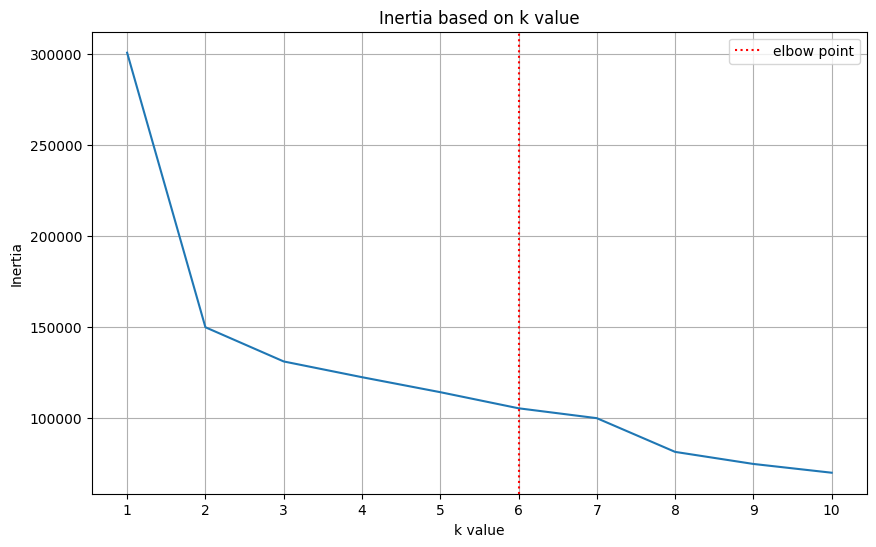

In [646]:
#b)
plt.figure(figsize=(10,6))
plt.plot(k_vals, inertia_values)
plt.xticks(k_vals)
plt.axvline(x=kl, linestyle="dotted", color="red", label="elbow point")

plt.xlabel("k value")
plt.ylabel("Inertia")
plt.title("Inertia based on k value")

plt.grid()
plt.legend()
plt.show()

Elbow point is labeled above

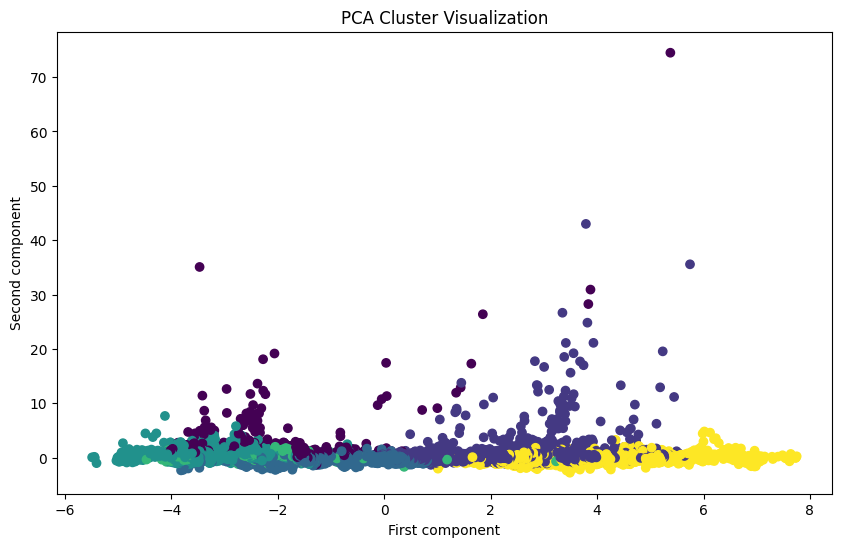

In [647]:
#c)
pca = PCA(n_components=0.90)
pca_fit = pca.fit_transform(df.drop("MedHouseVal", axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(pca_fit[:, 0], pca_fit[:, 1], c=k_preds)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("PCA Cluster Visualization")

plt.show()


### 2. Perform Gaussian Mixture Model Clustering:

In [648]:
g = GaussianMixture(n_components=2, random_state=270)

preds = g.fit_predict(df.drop("MedHouseVal", axis=1)) #use fit_predict built into scikit-learn

### 3. Evaluate Clustering Performance:

Silhouette score for GMM Clustering

In [649]:
#a)

print(silhouette_score(features, preds))

0.48855567130746236


Silhouette score for K-Means Clustering

In [650]:
print(silhouette_score(features, k_preds))

0.20871961983884138


b) Discussion:
##### The main strength of the GMM in this dataset is that the clustering gives more accurate results on average. I ran this notebook quite a few times. Although the difference in silhouette score is 0.28, it is sometimes less than this. Nevertheless, GMM provides more accurate clustering, evident by the silhouette score of 0.48. Visually in the PCA clustering above, you can see that there is a lot of overlap in the clustering, which is handled much better by GMM. It's main weakness is that it is more computationally expensive than K-Means clustering, and took longer to run
#####K-Means clustering's main strength is that was faster than GMM, and the k parameter was something that I could also set. It's main weakness is that the clusters had a significant amount of overlap, which was not handled the best by k-means clustering. Moreover, the outliers present in the above graph prove to be challenging for k-means clustering.